In [1]:
import pandas as pd

In [2]:
pr =  pd.read_csv('ed_purchase.csv')
rd = pd.read_csv('ed_redemption.csv')

In [3]:
print("Summary of purchase table: \n", pr.describe())
print()
print("Summary of redemption table: \n", rd.describe())

Summary of purchase table: 
              Sr No.  Bond\nNumber  Issue Branch Code  Issue Teller
count  18871.000000  18871.000000       18871.000000  1.887100e+04
mean    9436.000000  12181.003338         480.065550  5.895737e+06
std     5447.732801   6573.754865         395.446834  1.825395e+06
min        1.000000      8.000000           1.000000  1.013030e+06
25%     4718.500000   8317.500000           1.000000  5.054982e+06
50%     9436.000000  12350.000000         509.000000  6.405134e+06
75%    14153.500000  14764.000000         813.000000  7.273126e+06
max    18871.000000  71548.000000        1355.000000  8.492239e+06

Summary of redemption table: 
              Sr No.  Bond\nNumber  Pay Branch \nCode    Pay Teller
count  20421.000000  20421.000000       20421.000000  2.042100e+04
mean   10211.000000  11783.435140         559.467852  5.293055e+06
std     5895.179259   6525.685559         297.836567  1.953104e+06
min        1.000000     10.000000           1.000000  1.498450e+05
2

In [4]:
print("Purchase table headers")
print(pr.head())
print()
print("Print redemption table headers")
print(rd.head())

Purchase table headers
   Sr No.       Reference No (URN) Journal Date Date of \nPurchase  \
0       1  00001201904120000001166  12/Apr/2019        12/Apr/2019   
1       2  00001201904120000001166  12/Apr/2019        12/Apr/2019   
2       3  00001201904120000001166  12/Apr/2019        12/Apr/2019   
3       4  00001201904120000001166  12/Apr/2019        12/Apr/2019   
4       5  00001201904120000001166  12/Apr/2019        12/Apr/2019   

  Date of Expiry Name of the Purchaser Prefix  Bond\nNumber Denominations  \
0    26/Apr/2019  A B C INDIA LIMITED      TL         11448     10,00,000   
1    26/Apr/2019  A B C INDIA LIMITED      TL         11447     10,00,000   
2    26/Apr/2019  A B C INDIA LIMITED      TL         11441     10,00,000   
3    26/Apr/2019  A B C INDIA LIMITED      OL          1113      1,00,000   
4    26/Apr/2019  A B C INDIA LIMITED      OL          1118      1,00,000   

   Issue Branch Code  Issue Teller Status Unnamed: 6  
0                  1       5899230   P

In [5]:
merged_df = pd.merge(pr, rd, on='Bond\nNumber', suffixes=('_purchase', '_redemption'))


In [8]:
merged_df.to_csv('merged_data.csv', index=False)

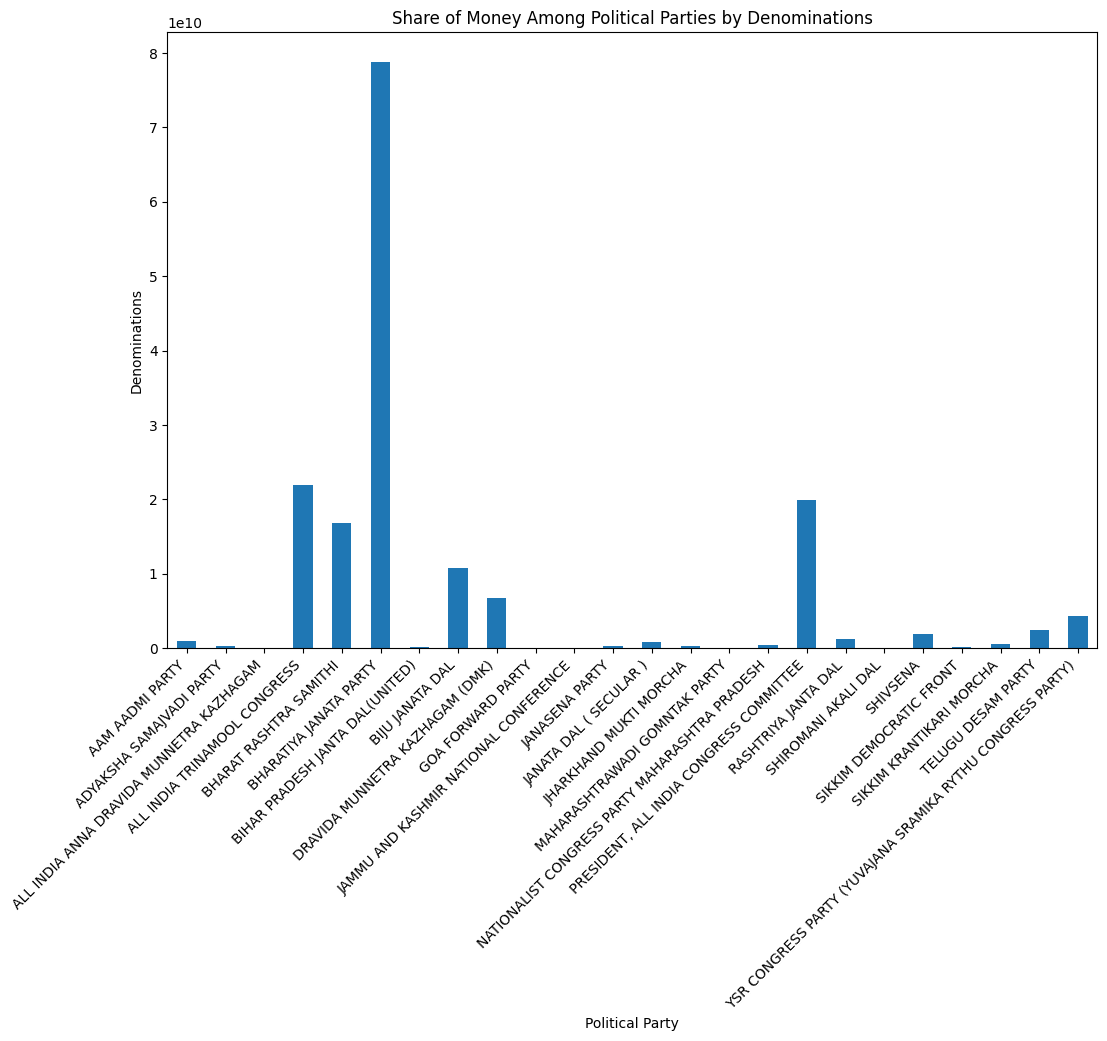

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the merged DataFrame

# Convert 'Denominations_redemption' column to numeric
merged_df['Denominations_redemption'] = merged_df['Denominations_redemption'].str.replace(',', '').astype(int)

# Group by 'Name of the Political Party' and sum the denominations
party_denominations = merged_df.groupby('Name of the Political Party')['Denominations_redemption'].sum()

# Plotting
plt.figure(figsize=(12, 8))
party_denominations.plot(kind='bar')
plt.title('Share of Money Among Political Parties by Denominations')
plt.xlabel('Political Party')
plt.ylabel('Denominations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


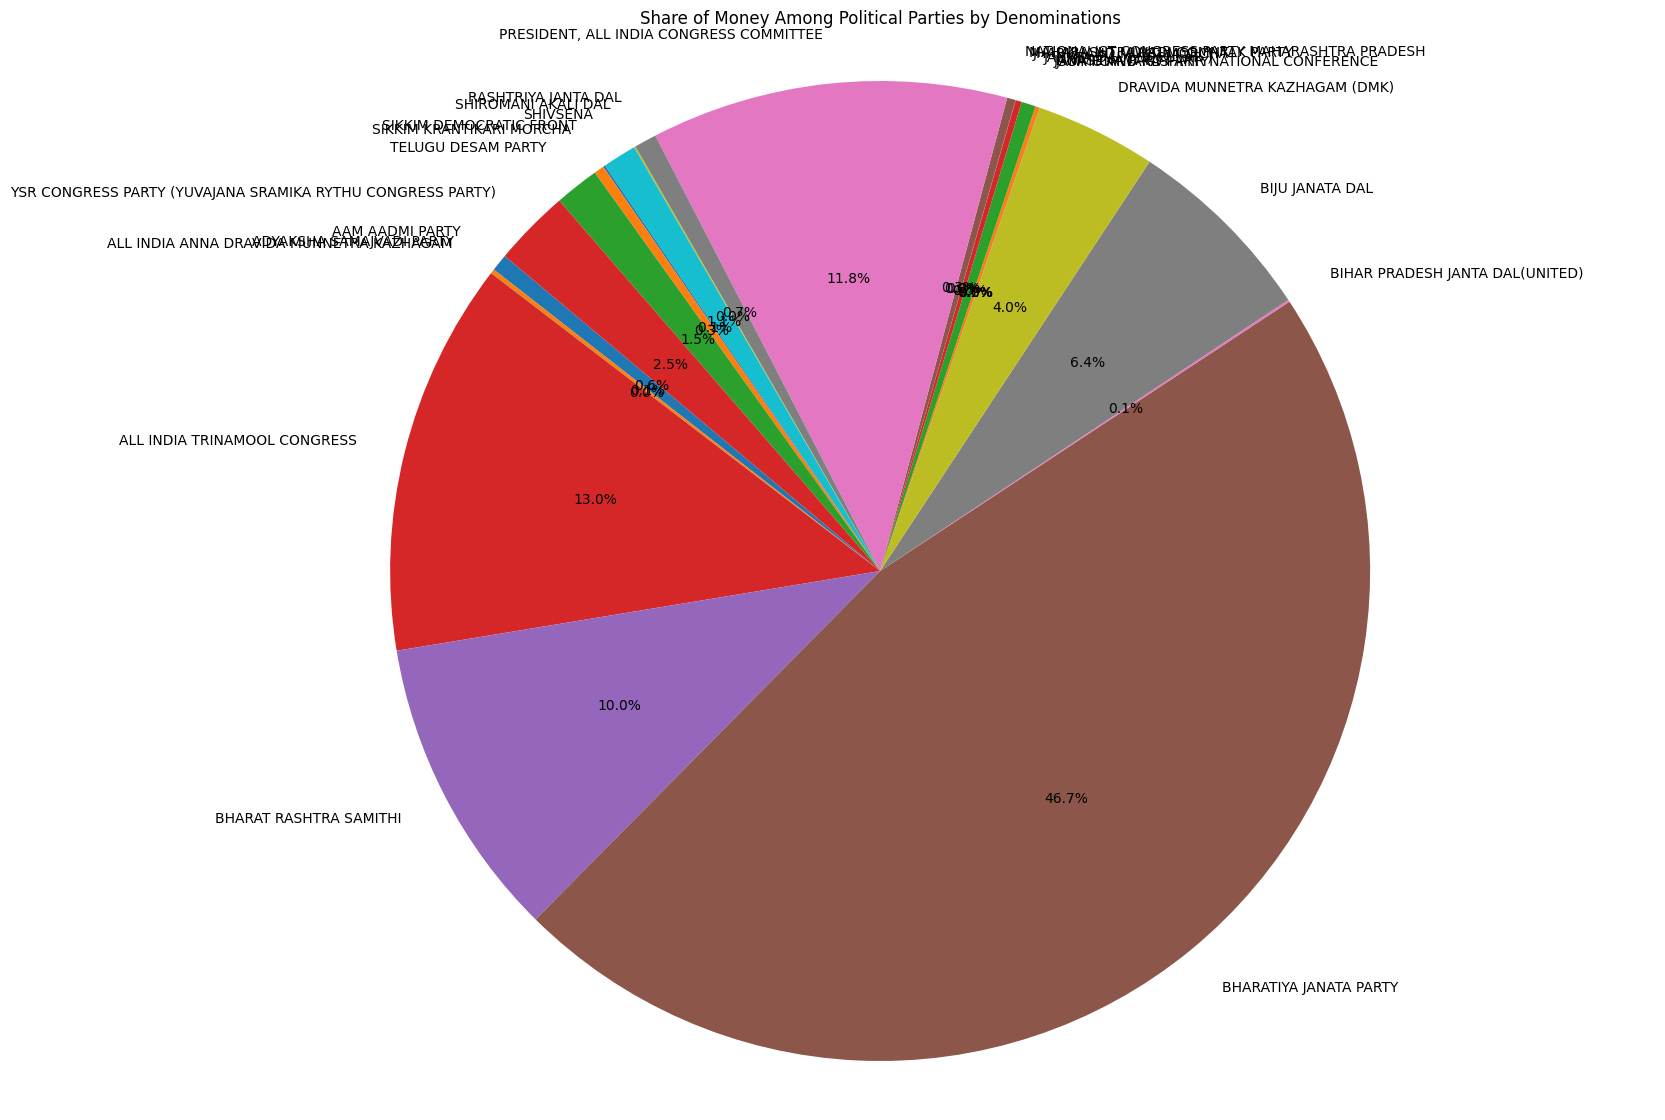

In [27]:


# Plotting
plt.figure(figsize=(20, 14))
plt.pie(party_denominations, labels=party_denominations.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Money Among Political Parties by Denominations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


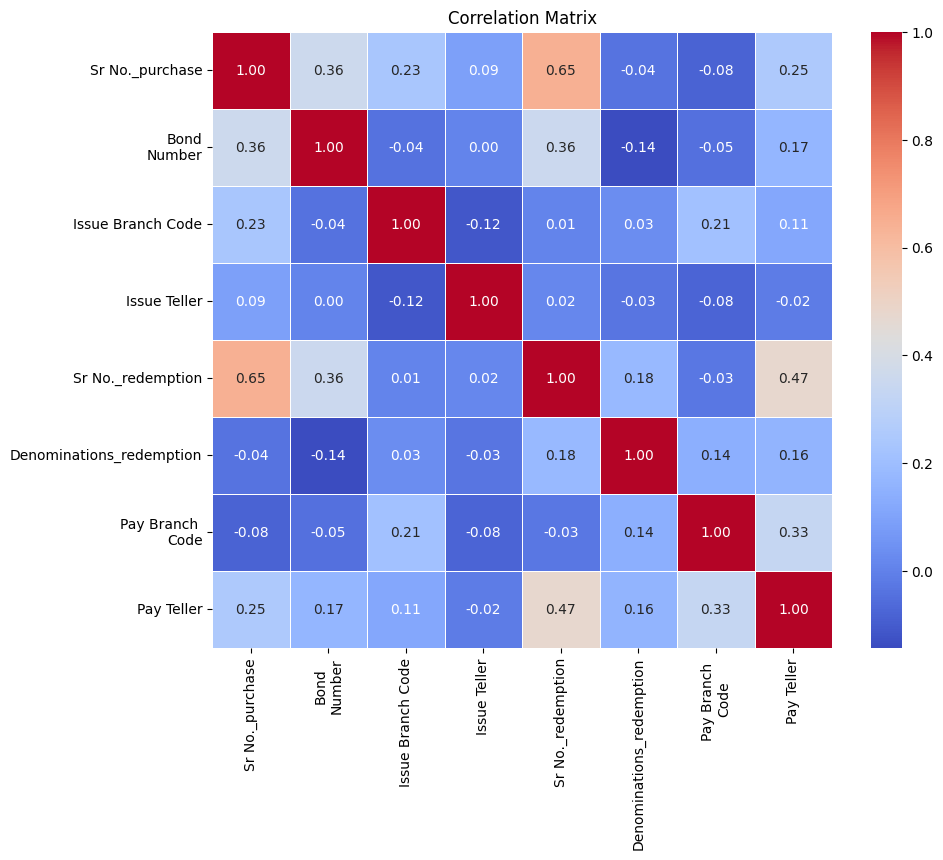

In [32]:
import seaborn as sns
# Compute the correlation matrix
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

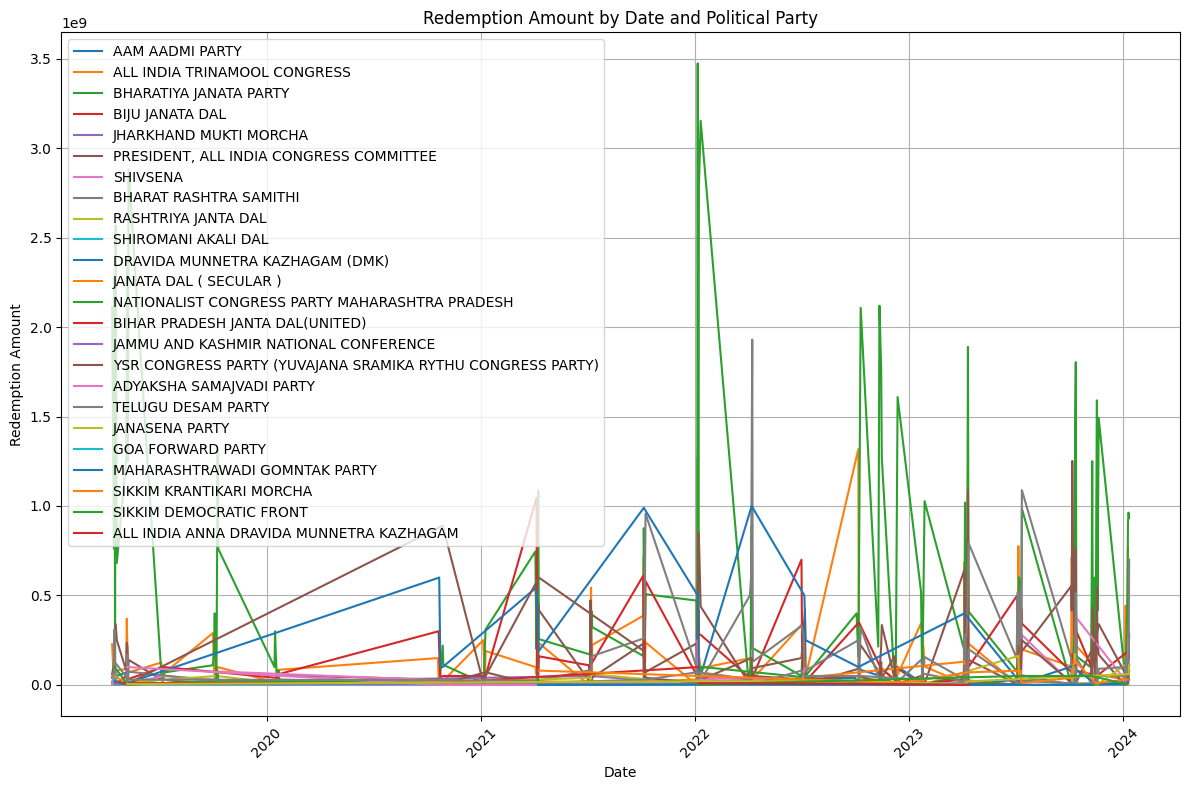

In [36]:
# Convert the date column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date of \nPurchase'], format='%d/%b/%Y')

# Group the data by date and political party and sum the redemption amounts
grouped_data = merged_df.groupby(['Date', 'Name of the Political Party'])['Denominations_redemption'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for party in grouped_data['Name of the Political Party'].unique():
    party_data = grouped_data[grouped_data['Name of the Political Party'] == party]
    plt.plot(party_data['Date'], party_data['Denominations_redemption'], label=party)

plt.title('Redemption Amount by Date and Political Party')
plt.xlabel('Date')
plt.ylabel('Redemption Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


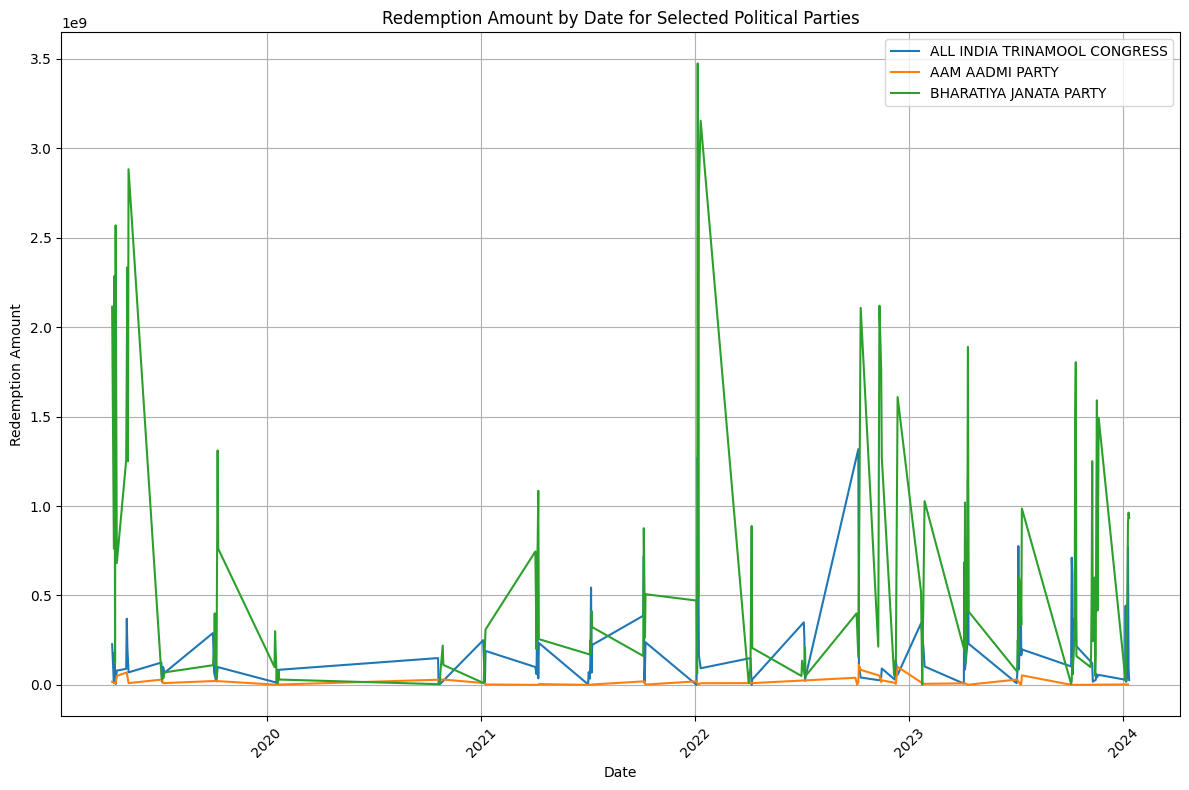

In [39]:
merged_df['Date'] = pd.to_datetime(merged_df['Date of \nPurchase'], format='%d/%b/%Y')

# Define the political parties you want to plot
selected_parties = ['ALL INDIA TRINAMOOL CONGRESS', 'AAM AADMI PARTY', 'BHARATIYA JANATA PARTY']  # Replace with the parties you want to plot

# Filter the data for the selected parties
filtered_data = merged_df[merged_df['Name of the Political Party'].isin(selected_parties)]

# Group the filtered data by date and political party and sum the redemption amounts
grouped_data = filtered_data.groupby(['Date', 'Name of the Political Party'])['Denominations_redemption'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for party in selected_parties:
    party_data = grouped_data[grouped_data['Name of the Political Party'] == party]
    plt.plot(party_data['Date'], party_data['Denominations_redemption'], label=party)

plt.title('Redemption Amount by Date for Selected Political Parties')
plt.xlabel('Date')
plt.ylabel('Redemption Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
merged_df['Date of \nPurchase'] = pd.to_datetime(merged_df['Date of \nPurchase'], format='%d/%b/%Y')

# Define the political parties you want to plot
selected_parties = ['ALL INDIA TRINAMOOL CONGRESS', 'AAM AADMI PARTY', 'BHARATIYA JANATA PARTY']  # Replace with the parties you want to plot

# Filter the data for the selected parties
filtered_data = merged_df[merged_df['Name of the Political Party'].isin(selected_parties)]

# Group the filtered data by date and political party and sum the redemption amounts
grouped_data = filtered_data.groupby(['Date of \nPurchase', 'Name of the Political Party'])['Denominations_redemption'].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(1200, 800))
grouped_data.plot(kind='bar', stacked=True, width=0.8)
plt.title('Redemption Amount by Date for Selected Political Parties')
plt.xlabel('Date of Purchase')
plt.ylabel('Redemption Amount')
plt.xticks(rotation=45)
plt.legend(title='Political Party')
plt.grid(True)
# plt.tight_layout()
# plt.show()
plt.savefig("output.jpg")